In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn=mysql.connector.connect(
    host='database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_ym',
    password='ym',
    database='eda_project'
)

cur=conn.cursor(buffered=True)



/tmp/ipykernel_13486/2303689001.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## high tier data

In [21]:
sql='''select win,avg(visionScore), avg(stealthWardsPlaced), avg(controlWardsPlaced) from match_data
       where ranking='high'
       group by win
       order by win;'''

cur.execute(sql)

result=cur.fetchall()
high=pd.DataFrame(result)

high.rename(index={1:'lose',2:'win'},columns={0:'win',1:'visionScore (H)',2:'stealthWards (H)',3:'controlWards (H)'},inplace=True)
high.drop(index=0,inplace=True)
high

,win,visionScore (H),stealthWards (H),controlWards (H)
lose,0.0,25.4316,7.1172,2.4307
win,1.0,28.4718,7.2076,2.7137


## low tier data

In [22]:
sql='''select win,avg(visionScore), avg(stealthWardsPlaced), avg(controlWardsPlaced) from match_data
       where ranking='low'
       group by win
       order by win;'''

cur.execute(sql)

result=cur.fetchall()
low=pd.DataFrame(result)
low.rename(index={1:'lose',2:'win'},columns={0:'win',1:'visionScore (L)',2:'stealthWards (L)',3:'controlWards (L)'},inplace=True)
low.drop(index=0,inplace=True)
low

,win,visionScore (L),stealthWards (L),controlWards (L)
lose,0.0,25.3361,7.1233,2.4149
win,1.0,28.3966,7.2004,2.6907


## stealthWards graph

In [23]:
stealth=pd.concat([high.iloc[0:,2],low.iloc[0:,2]],axis=1).T
stealth.reset_index(drop=True)
stealth=stealth.astype(float)
stealth

,lose,win
stealthWards (H),7.1172,7.2076
stealthWards (L),7.1233,7.2004


Text(0.5, 1.0, 'StealthWard By Tier')

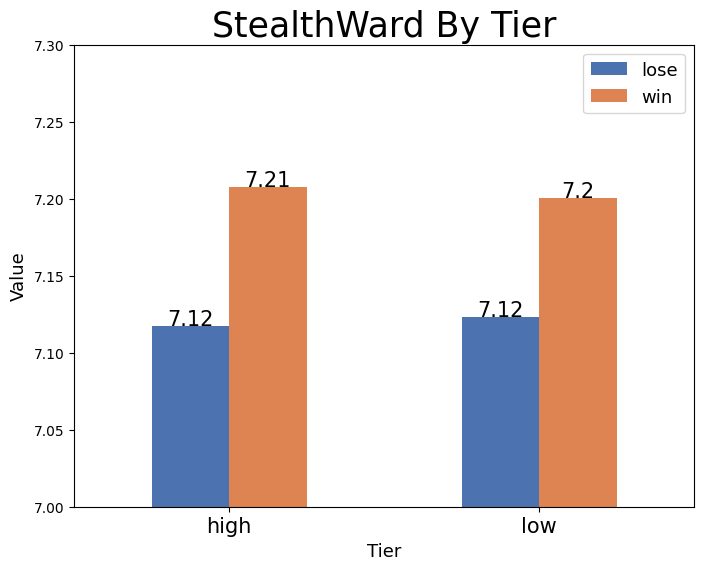

In [25]:
ax=stealth.plot(kind='bar',figsize=(8,6), color=sns.color_palette("deep"))
plt.ylim(7,7.3)
ax.set_xticklabels(['high','low'],rotation=0,fontsize=15)
ax.set_xlabel('Tier',fontsize=13)
ax.set_ylabel('Value',fontsize=13)
ax.legend(labels=['lose','win'],fontsize=13)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=15)
ax.set_title('StealthWard By Tier',fontsize=25)

## controlWards graph

In [24]:
control=pd.concat([high.iloc[0:,3],low.iloc[0:,3]],axis=1).T
control.reset_index(drop=True)
control=control.astype(float)
control

,lose,win
controlWards (H),2.4307,2.7137
controlWards (L),2.4149,2.6907


Text(0.5, 1.0, 'ControlWards By Tier')

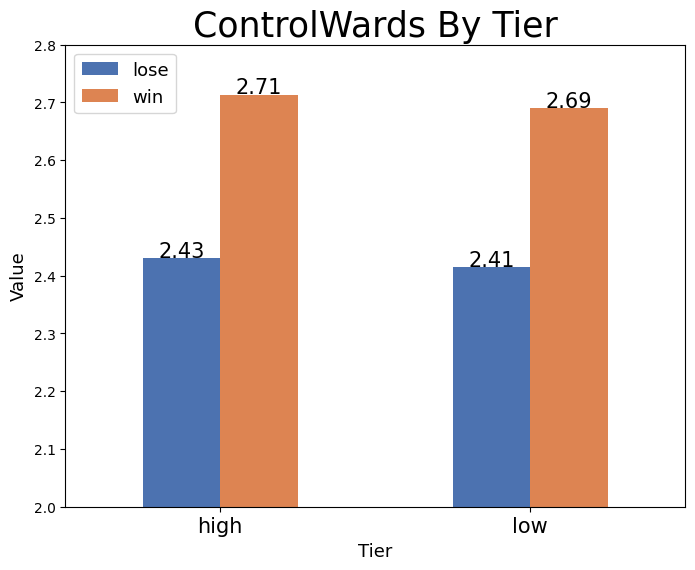

In [26]:
ax=control.plot(kind='bar', figsize=(8,6), color=sns.color_palette("deep"))
plt.ylim(2,2.8)
ax.set_xticklabels(['high','low'],rotation=0,fontsize=15)
ax.set_xlabel('Tier',fontsize=13)
ax.set_ylabel('Value',fontsize=13)
ax.legend(labels=['lose','win'],fontsize=13)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=15)
ax.set_title('ControlWards By Tier',fontsize=25)

## visionScore graph

In [28]:
score=pd.concat([high.iloc[0:,1],low.iloc[0:,1]],axis=1).T
score=score.astype(float)
score

,lose,win
visionScore (H),25.4316,28.4718
visionScore (L),25.3361,28.3966


Text(0.5, 1.0, 'VisionScore By Tier')

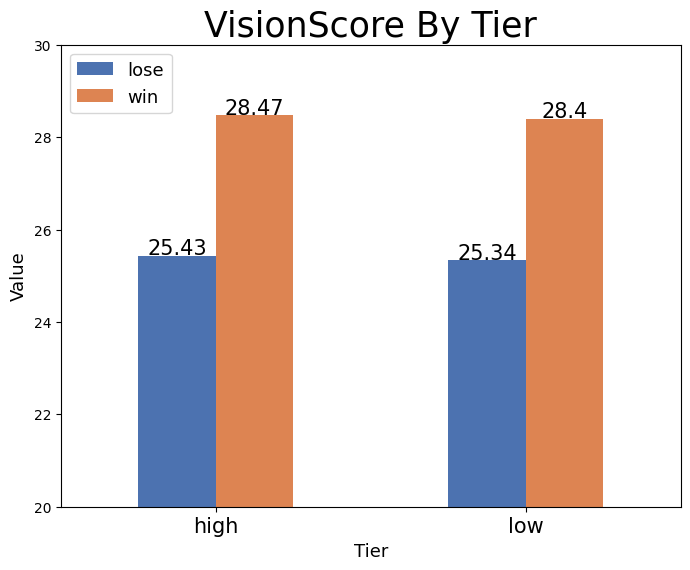

In [29]:
ax=score.plot(kind='bar', figsize=(8,6), color=sns.color_palette("deep"))
plt.ylim(20,30)
ax.set_xticklabels(['high','low'],rotation=0,fontsize=15)
ax.set_xlabel('Tier',fontsize=13)
ax.set_ylabel('Value',fontsize=13)
ax.legend(labels=['lose','win'],fontsize=13,loc='upper left')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=15)
ax.set_title('VisionScore By Tier',fontsize=25)

## win rate by visionScore

In [30]:
sql='''select avg(visionScore), win from match_data
       group by matchId, win;'''

cur.execute(sql)

result=cur.fetchall()
vision=pd.DataFrame(result)

In [31]:
vision.rename(columns={0:'visionscore',1:'win'},inplace=True)
vision

,visionscore,win
0,5.2000,0.0
1,13.0000,1.0
2,32.2000,0.0
3,30.4000,1.0
4,11.4000,0.0
...,...,...
69103,34.4000,1.0
69104,46.2000,0.0
69105,43.6000,1.0
69106,10.4000,0.0


In [32]:
vision['visionscore']=vision['visionscore']//5*5
graph = vision.groupby(['visionscore']).apply(lambda x: x['win'].mean()).reset_index(name='win_rate')

/tmp/ipykernel_13486/1118601995.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  graph = vision.groupby(['visionscore']).apply(lambda x: x['win'].mean()).reset_index(name='win_rate')


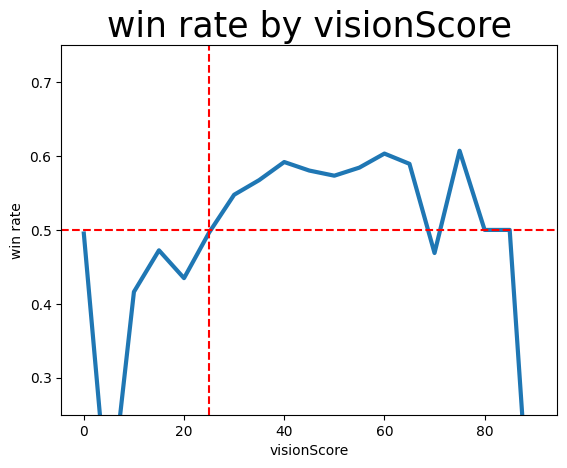

In [33]:
plt.plot(graph['visionscore'], graph['win_rate'],linewidth=3)
plt.title("win rate by visionScore",fontsize=25)
plt.xlabel("visionScore")
plt.ylim(0.25, 0.75)
plt.ylabel("win rate")
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=25, color='r', linestyle='--')
plt.show()

In [35]:
conn.close()